## Imports, SER load

Fit did not succeed


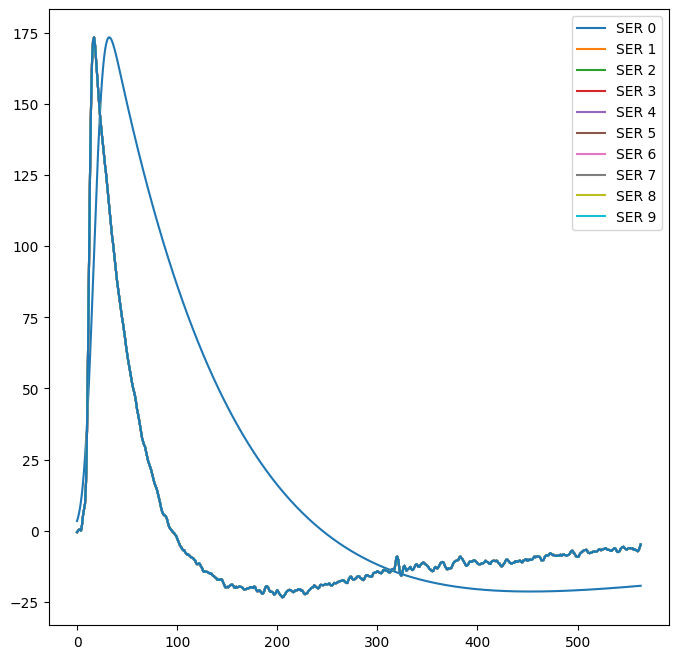

In [22]:


import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from lib.fit_functions import sc_fit

debugging=True
# debugging=False

new_SER = np.loadtxt("data/raw/SPE_maritza.txt")
new_SER = 500*new_SER[60:-3]

fit = sc_fit(new_SER,np.arange(len(new_SER)),0,OPT={})
plt.plot(np.max(new_SER)*fit/np.max(fit))

SER=[]

for i in range(10):
    SER.append(new_SER)
if debugging: plt.plot(SER[0])

for i in  range(1,10):
    # SER.append(np.insert(new_SER[10-i::10],0,0))
    if debugging: 
        plt.plot(SER[i])
        # plt.xlim(3,10)
        # plt.ylim(3,10)
if debugging: plt.legend(["SER {}".format(i) for i in range(10)]);

## Singal/Noise functions

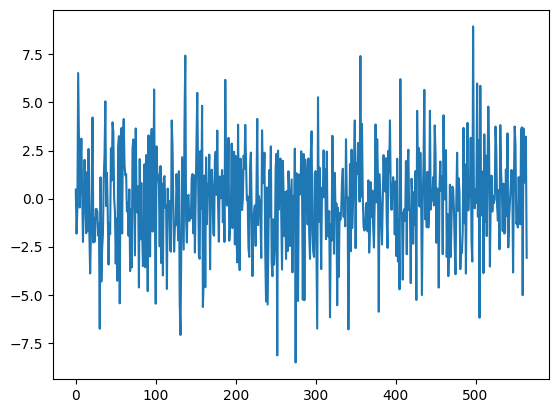

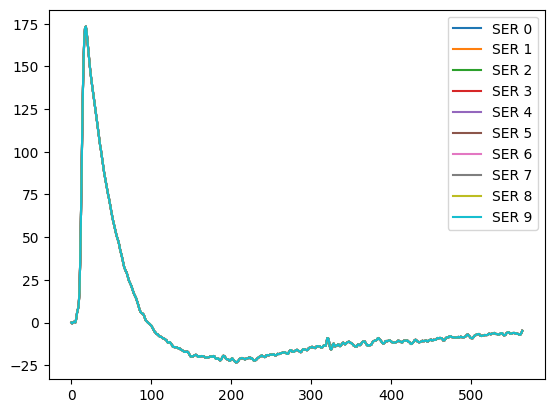

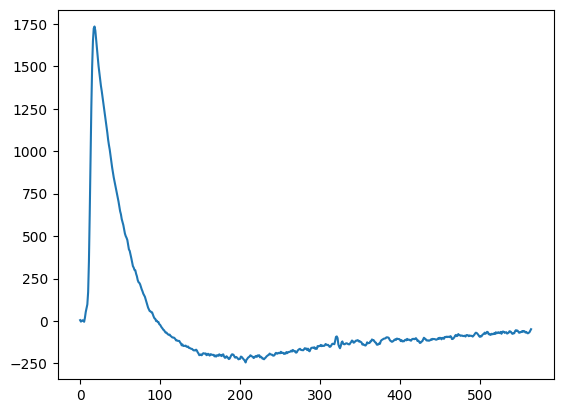

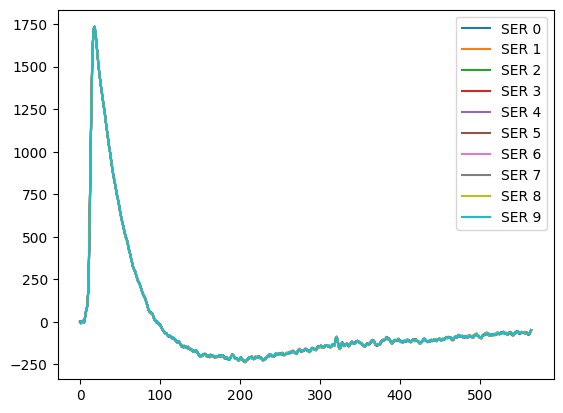

In [2]:
from functions import Add_GaussNoise,Add_signal,Add_signal_OLD,Produce_WVFS
array_len = len(new_SER)+1
if debugging: plt.plot(Add_GaussNoise(np.zeros(array_len)));
if debugging: 
    plt.figure()

    for i in range(10):
        plt.plot(Add_signal(np.zeros(array_len),SER,time=float(1+i/10)))
    # plt.xlim(3,10)
    # plt.ylim(3,10)
    plt.legend(["SER {}".format(i) for i in range(10)]);

    plt.figure()
    plt.plot(Add_GaussNoise(  Add_signal(np.zeros(array_len),SER,time=1,npe=10)  ))

    plt.figure()
    for i in range(10):
        plt.plot(Add_GaussNoise(  Add_signal(np.zeros(array_len),SER,time=float(1+i/10),npe=10)  ))
    # plt.xlim(3,10)
    # plt.ylim(3,100)
    plt.legend(["SER {}".format(i) for i in range(10)]);

# if debugging:
#     plt.figure()

#     plt.xlim(3,10)
#     plt.ylim(3,100)
#     plt.plot((  Add_signal    (np.zeros(array_len),SER,time=1.9,npe=100)  ))
#     plt.plot((  Add_signal_OLD(np.zeros(array_len),SER,time=1.9,npe=100)  ))


## WVF Production

In [4]:
from functions import Produce_WVFS,rand_scint
import awkward as ak
PRE_TIME=100
FREQ    =1/(12.5e-9)
WVF_SIZE=int(12.5e-6*FREQ)*2
# WVF_SIZE=array_len
N_WVF   = array_len
N_PHOTO = np.random.randint(low=1 ,high=10,size=N_WVF)
T_TRUTH = ak.Array([rand_scint(photons,fast=6/12.5,slow=1300/12.5)+PRE_TIME for photons in N_PHOTO])
# T_TRUTH = [rand_scint(photons,fast=0.00001,slow=1300/12.5)+PRE_TIME for photons in N_PHOTO]


WVF,WVF_OLD=Produce_WVFS(
WVF_SIZE,
N_WVF,
T_TRUTH,
N_PHOTO,
SER
)

WVF=np.array(WVF)

WVF    =WVF    [np.max(WVF,axis=1)>10]
N_WVF  =len(WVF)
T_TRUTH=T_TRUTH[np.max(WVF,axis=1)>10]
t_truth=np.array([min(T_TRUTH[i]) for i in range(N_WVF)])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

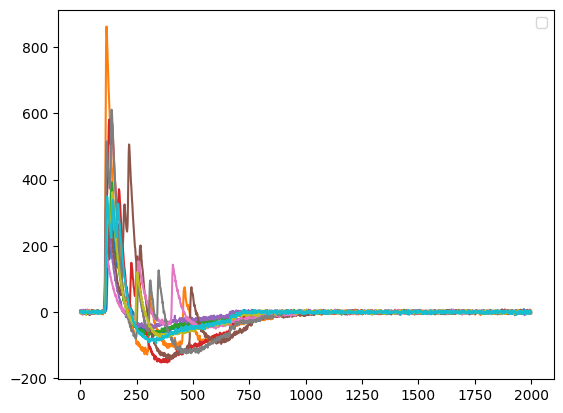

In [6]:
for i in range(10):
    plt.plot(WVF[i])
    # plt.legend()

## WVF analysis

### Gauss filtering

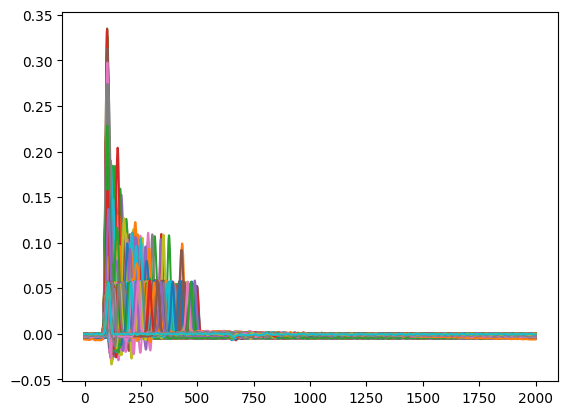

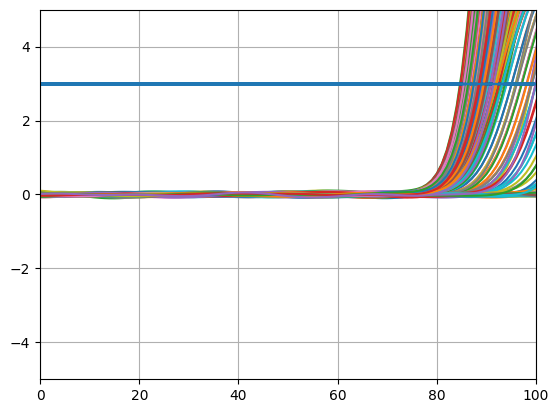

In [7]:
WVF_FILTERED    =[]
WVF_FILTERED_OLD=[]

def make_GaussFilter(wvf,omega_cut=0.002558):
    # Creates a gauss filter with WVF size in the frequency domain with charactheristic frecency OMEGA_CUT in GHz
    gaus_f   =np.exp(- (np.arange(len(wvf))*0.08/WVF_SIZE/ omega_cut )**2)
    gaus_f[0]=0;
    return gaus_f;

def Remove_pedestal(wvf,nbins=50):
    ped=np.mean(wvf[:nbins])
    # if debugging:print(ped)
    
    return wvf-ped;T_RECO,
# T_RECO_FIT_PEAK,
# T_RECO_FIT_RISE_LINEAR,
# T_RECO_FIT_RISE_GAUSS,
# T_RECO_FIT_RAW,


for wvf in WVF:
    wvf_f  =fft.rfft(wvf)
    gauss_f=make_GaussFilter(wvf_f);
    numerator=np.zeros(WVF_SIZE);
    numerator[:len(SER[0])]=SER[0];

    wvf_filtered=fft.irfft(wvf_f/fft.rfft(numerator)*gauss_f)
    WVF_FILTERED.append(wvf_filtered)

    if debugging: plt.plot(wvf_filtered)

for wvf in WVF_OLD:
    wvf_f  =fft.rfft(wvf)
    gauss_f=make_GaussFilter(wvf_f);
    numerator=np.zeros(WVF_SIZE);
    numerator[:len(SER[0])]=SER[0];

    wvf_filtered=fft.irfft(wvf_f/fft.rfft(numerator)*gauss_f)
    WVF_FILTERED_OLD.append(wvf_filtered)

    if debugging: plt.plot(wvf_filtered)

for i in range(N_WVF):
    WVF_FILTERED[i]=Remove_pedestal( WVF_FILTERED[i] )*100

if debugging:
    #baseline never croses 3
    plt.figure()
    for wvf in WVF_FILTERED:
        plt.plot(wvf)
        plt.xlim([0,100])
        plt.ylim([-5,5])
        plt.grid(True)
        plt.hlines(3,0,100)

In [8]:
# %matplotlib qt
from scipy.optimize import curve_fit

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gaus_deriv(x,a,x0):
    sigma=8 #fixed
    return -a*(x-x0)*np.exp(-(x-x0)**2/(2*sigma**2))


### Filtered


In [7]:
# %matplotlib qt

# i=7

# plt.plot(WVF                            [i])
# plt.plot(WVF_FILTERED                   [i])
# plt.plot(np.gradient(WVF_FILTERED       [i]))
# plt.vlines(T_RECO                       [i],0,5,color="red")
# plt.vlines(T_RECO_DERIVATIVE            [i],0,5,color="black")
# plt.vlines(t_truth                      [i],0,5)
# plt.xlim                        (t_truth[i]-30,t_truth
#                                         [i]+50)
# print(T_TRUTH[i])


In [9]:
import scipy.signal
scipy.signal.find_peaks(WVF_FILTERED[0],height=2)

## Find the peaks

T_RECO                 =np.zeros(N_WVF) -999
T_RECO_FIT_PEAK        =np.zeros(N_WVF) -999
T_RECO_FIT_RISE_LINEAR =np.zeros(N_WVF) -999
T_RECO_FIT_RISE_GAUSS  =np.zeros(N_WVF) -999
T_RECO_DERIVATIVE      =np.zeros(N_WVF) -999
T_RECO_DERIVATIVE_2POINTS=np.zeros(N_WVF) -999
T_RECO_DERIVATIVE_POINT=np.zeros(N_WVF) -999

for i in range(N_WVF):
    
 

    idx_max   = scipy.signal.find_peaks(WVF_FILTERED[i],height=1.5)[0][0];
    idx_third = np.argwhere(WVF_FILTERED[i]>(1/3*scipy.signal.find_peaks(WVF_FILTERED[i],height=1)[1]["peak_heights"][0])) [0][0];
    
    # Old (wvf peak)
    T_RECO    [i]=    idx_max;

    #Gaus peak fit
    try:
        x=np.arange(idx_max-5,idx_max+5)
        y=WVF_FILTERED[i][x]

        popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),x[np.argmax(y)],5])
        T_RECO_FIT_PEAK[i]=popt[1]
    except: #no good fit available, keep the peak instead
        T_RECO_FIT_PEAK[i]=idx_max

    #linear fit to rise

    try:
        x=np.arange(idx_third-2,idx_third+5)
        y=WVF_FILTERED[i][x]
        m, x0 = np.polyfit(x, y, 1)
        T_RECO_FIT_RISE_LINEAR[i]=-x0/m
    except: #no good fit available, keep the peak instead
        T_RECO_FIT_RISE_LINEAR[i]=idx_third
    
    # Gaus fit to rise
    try:
        x=np.arange(idx_third-2,idx_third+7)
        y=WVF_FILTERED[i][x]
        popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),x[np.argmax(y)],5])
        T_RECO_FIT_RISE_GAUSS[i]=popt[1]
    except: #no good fit available, keep the peak instead
        T_RECO_FIT_RISE_GAUSS[i]=idx_max

    #Derivative max point
    # T_RECO_DERIVATIVE[i]=scipy.signal.find_peaks(np.gradient(WVF_FILTERED[i]),height=.5)[0][0]
        #Derivative max point
    idx_max=scipy.signal.find_peaks(np.gradient(WVF_FILTERED[i]),height=.3)[0][0]
    idx_min=scipy.signal.find_peaks(-np.gradient(WVF_FILTERED[i]),height=.3)[0][0]
    A=scipy.signal.find_peaks(np.gradient(WVF_FILTERED[i]),height=.3)[1]["peak_heights"][0]

    x=np.arange(idx_max-3,idx_max+3)
    y=np.gradient(WVF_FILTERED[i])[x]
    popt,pcov=curve_fit(gaus_deriv,x,y,p0=[A,(idx_max+idx_min)/2])
    T_RECO_DERIVATIVE[i]=popt[1]
    T_RECO_DERIVATIVE_2POINTS[i]=(idx_max+idx_min)/2
    T_RECO_DERIVATIVE_POINT[i]=idx_max


Text(0, 0.5, 'Amp in a.u.')

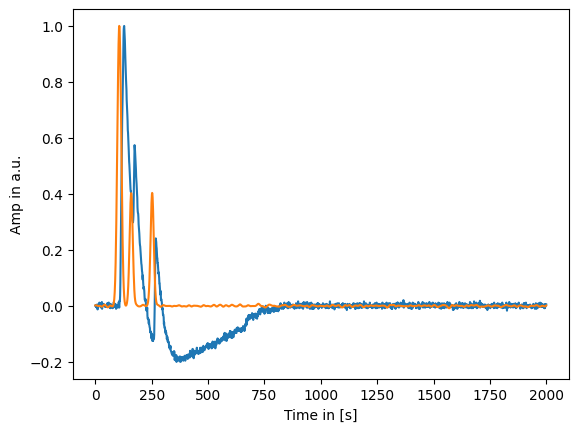

In [14]:
plt.figure()

plt.plot(WVF[i]/np.max(WVF[i]))
plt.plot(WVF_FILTERED[i]/np.max(WVF_FILTERED[i]))
# plt.plot(np.gradient(WVF_FILTERED[i])/np.max(np.gradient(WVF_FILTERED[i])))


x=np.arange(idx_third-2,idx_third+19)
y=WVF_FILTERED[i][x]
# x=12e-9*np.arange(idx_third-2,idx_third+19)
# plt.plot(x,y/np.max(y))
# plt.semilogy()
plt.xlabel("Time in [s]")
plt.ylabel("Amp in a.u.")
# popt,pcov = curve_fit(gaus,x,y,p0=[np.max(y),x[np.argmax(y)],5])
# T_RECO_FIT_RISE_GAUSS[i]=popt[1]

# print(t_truth[i],popt[1])

### Results

In [19]:
%matplotlib qt
plt.figure(dpi=100)
for results in [
T_RECO,
T_RECO_FIT_PEAK,
# T_RECO_FIT_RISE_LINEAR,
# T_RECO_FIT_RISE_GAUSS-1,
T_RECO_DERIVATIVE,
# T_RECO_DERIVATIVE_POINT,
# T_RECO_DERIVATIVE_2POINTS,
]:

    # plt.hist(((results-t_truth) - np.mean(results-t_truth))*12.5   ,100,[-20,20],alpha=.5);
    plt.hist(((results-t_truth) )*12.5   ,100,[-100,100],alpha=.5);

plt.legend(["Old                ", 
            "Peak gaussian fit  ",
            # "linear fit (rising)",
            # "Gauss fit (rising) ",
            # "Raw fit exp4 (rising) ",
            "Derivative fit     "], loc='upper left')
plt.xlabel("$\Delta T: T_{Reco}-T_{Truth}$ (ns)");
plt.ylabel("Entries");
plt.semilogy()

print("STD->Old                :","{:.2f}".format(np.std( (T_RECO           -t_truth)*12.5                                           )))
print("STD->Peak gaussian fit  :","{:.2f}".format(np.std( (T_RECO_FIT_PEAK  -t_truth)*12.5                                           )))
print("STD->linear fit (rising):","{:.2f}".format(np.std( (T_RECO_FIT_RISE_LINEAR-t_truth)*12.5                                   )))
print("STD->Gauss fit (rising) :","{:.2f}".format(np.std( (T_RECO_FIT_RISE_GAUSS -t_truth   )*12.5                                   )))
# print("STD->Raw   fit (rising) :","{:.2f}".format(np.std( (T_RECO_FIT_RAW   -t_truth)*12.5-np.mean((T_RECO_FIT_RAW   -t_truth))*12.5 )))
print("STD->Derivative fit     :","{:.2f}".format(np.std( (T_RECO_DERIVATIVE -t_truth   )*12.5                                   )))
print("STD->Derivative point     :","{:.2f}".format(np.std( (T_RECO_DERIVATIVE_POINT -t_truth   )*12.5                                   )))
print("STD->Derivative 2points   :","{:.2f}".format(np.std( (T_RECO_DERIVATIVE_2POINTS -t_truth   )*12.5                                   )))

# plt.semilogy()


QSocketNotifier: Can only be used with threads started with QThread


STD->Old                : 38.72
STD->Peak gaussian fit  : 38.15
STD->linear fit (rising): 9.11
STD->Gauss fit (rising) : 16.85
STD->Derivative fit     : 12.11
STD->Derivative point     : 12.86
STD->Derivative 2points   : 44.31


In [20]:
# global resolution as a function of the #signals
import random
N_signals=100

#unbias the sample
# plt.hist((T_RECO_FIT_RAW-t_truth-np.mean((T_RECO_FIT_RAW   -t_truth)))*12.5,20,[-10,10] )
ls=[]
ls2=[]
for i in range(array_len):
    sel=random.sample(range(N_WVF),N_signals)

    sel_signals_gaus=(T_RECO_DERIVATIVE[sel]-t_truth[sel])*12.5
    ls2.append(min(sel_signals_gaus))

# plt.hist(ls2,40,[-20,40] )
plt.hist(ls2,20 )

ls2=np.array(ls2)

print(np.std(ls2), len(ls2[(ls2>(np.mean(ls2)-2*np.std(ls2))) & 
                         (ls2<(np.mean(ls2)+2*np.std(ls2))) ])/len(ls2) )


0.9034263294413538 0.9575221238938053


In [21]:
[(T_RECO_DERIVATIVE-t_truth)<-100/12.5]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      